https://www.datacamp.com/tutorial/random-forests-classifier-python

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=None, names=col_names, skiprows=[0])
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# split dataset in features and target variable
X = pima[['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']] # Features
y = pima.label # Target variable

In [6]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [7]:
# training the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
# n_estimators: the number of decision trees in the forest.
print(rf.n_estimators, rf.max_depth)

100 None


In [10]:
# evaluating the model with the test data
y_pred = rf.predict(X_test)

In [11]:
# evaluate the performance metrics
accuracy = accuracy_score(y_test, y_pred) # accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = precision_score(y_test, y_pred) # precision = TP / TP + FP
recall = recall_score(y_test, y_pred) # precision = TP / (TP + FN)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7965367965367965


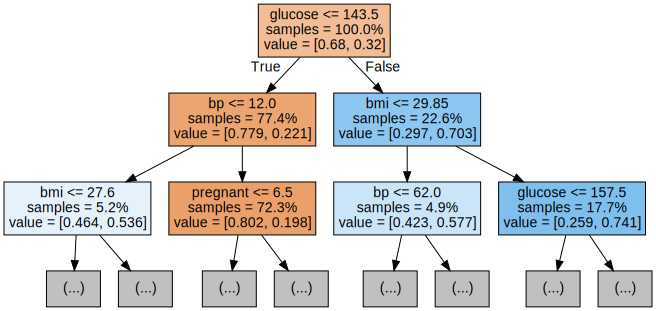

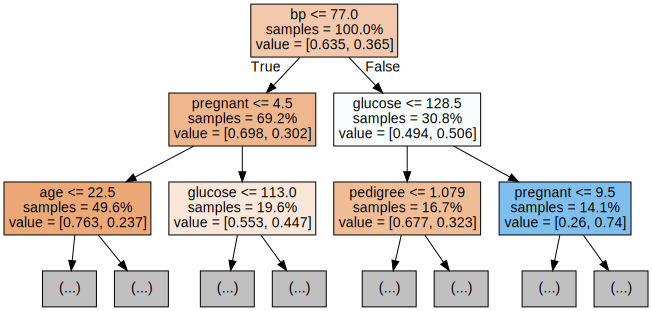

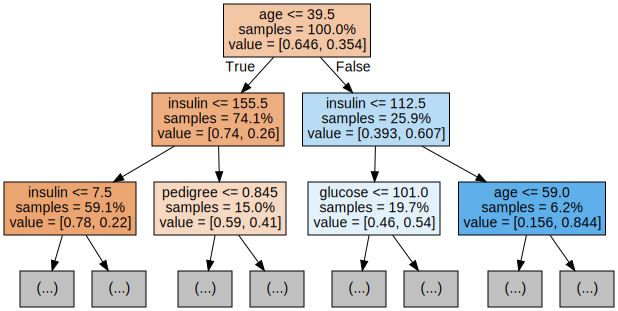

In [12]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [16]:
# performance tunning
# RandomizedSearchCV randomly search parameters within a range per hyperparameter.
# If we don’t passe a scoring system to the function, so it defaults to accuracy.
# This function also uses cross validation, which means it splits the data into five equal-sized groups and uses 4 to train and 1 to test the result.
# It will loop through each group and give an accuracy score, which is averaged to find the best model.

param_dist = {'n_estimators': randint(50,500), # n_estimators: the number of decision trees in the forest.
               'max_depth': randint(1,20)} # max_depth: the maximum depth of each decision tree. Setting a higher value for max_depth can lead to overfitting while setting it too low can lead to underfitting.

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
# RandomizedSearchCV will train many models (defined by n_iter_)
rand_search = RandomizedSearchCV(rf,
                                 param_distributions=param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78ffea0277c0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78ffea025b70>})

In [17]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 274}


In [21]:
# evaluating the model with the test data
y_pred = best_rf.predict(X_test)

# evaluate the performance metrics
accuracy = accuracy_score(y_test, y_pred) # accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = precision_score(y_test, y_pred) # precision = TP / TP + FP
recall = recall_score(y_test, y_pred) # precision = TP / (TP + FN)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8008658008658008
Precision: 0.8
Recall: 0.611764705882353


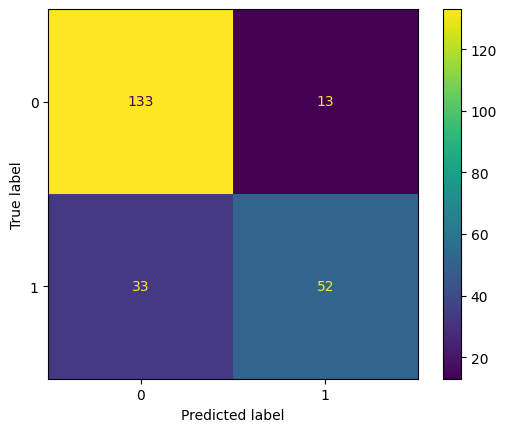

In [20]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [24]:
# importance of each feature,
best_rf.feature_importances_

array([0.07192922, 0.07499635, 0.19925143, 0.1535615 , 0.33747064,
       0.06421056, 0.09858029])

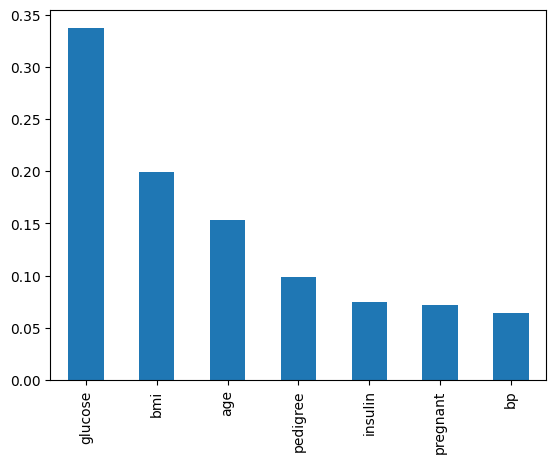

In [22]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();